<a href="https://colab.research.google.com/github/Kundansairaj100/SE_EXP_3/blob/main/SE_EXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SE_EXP_3: ITERATIVE MODEL

In [1]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Generating synthetic weather data
np.random.seed(42)
x = np.linspace(0,365,365) #Days in a year
y = 0.01 * x**2 - 0.3 * x + 20 + np.random.normal(0,5,365)  #Quadratic data with noise

#Normalize x
x_normalized = (x - np.mean(x)) / np.std(x)

In [4]:
#Initializing parameters
a,b,c = 0.0,0.0,0.0
learning_rate = 1e-4
iterations = 10000
lambda_reg = 0.01 #Regularization strength


Iteration 0: Cost = 3051.6114700021794
Iteration 1000: Cost = 2945.8472145378305
Iteration 2000: Cost = 2855.9257521810905
Iteration 3000: Cost = 2778.989317635752
Iteration 4000: Cost = 2712.8297471356477
Iteration 5000: Cost = 2655.7099919215175
Iteration 6000: Cost = 2606.2402990106702
Iteration 7000: Cost = 2563.2914640451286
Iteration 8000: Cost = 2525.9333411928
Iteration 9000: Cost = 2493.3906602746883
Final parameters: a = 127.2642, b = 349.9174, c = 273.2921


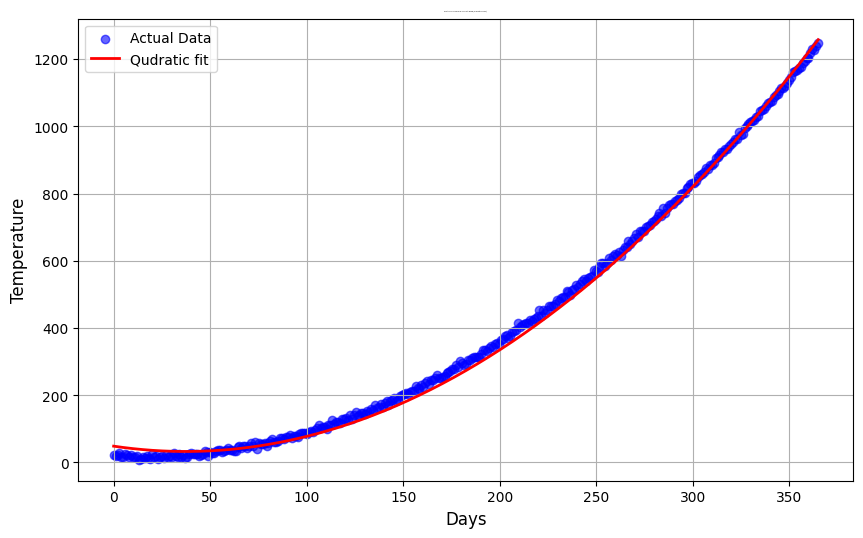

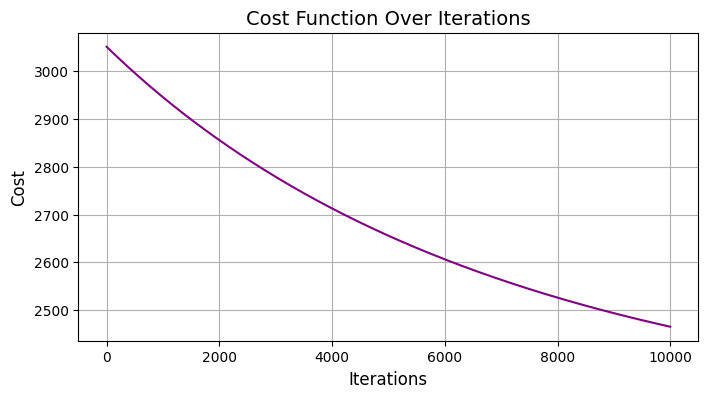

In [9]:
n = len(y)

#Gradient Descent Loop
cost_history = []
for i in range(iterations):
  #Predicted values
  y_pred = a*x_normalized**2 + b*x_normalized + c
  error = y - y_pred

  #compute gradients
  a_grad = (-2/n) * np.sum(x_normalized**2 * error) + 2 * lambda_reg * a
  b_grad = (-2/n) * np.sum(x_normalized * error) + 2 * lambda_reg * b
  c_grad = (-2/n) * np.sum(error) + 2*lambda_reg * c

  #update parameters
  a -= learning_rate * a_grad
  b -= learning_rate * b_grad
  c -= learning_rate * c_grad

  #computing cost
  cost = np.mean(error**2)+lambda_reg*(a**2+b**2+c**2)
  cost_history.append(cost)

  # print progress every 1000 iterations
  if i%1000 == 0:
    print(f"Iteration {i}: Cost = {cost}")

# Final paramters
print(f"Final parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}")

#Generate predictions using the final model
y_final_pred = a*x_normalized**2 + b*x_normalized + c

#plot the data and model
plt.figure(figsize=(10,6))
plt.scatter(x,y,label='Actual Data',alpha=0.6,color='blue')

#Plot the predicted qudratic fit
plt.plot(x,y_final_pred,label='Qudratic fit',color = 'red',linewidth=2)

#Plot Formatting
plt.title("Weather Modeling Using Quadratic Model (Gradient Descent)",fontsize=1)
plt.xlabel("Days",fontsize=12)
plt.ylabel("Temperature",fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#Plot cost history
plt.figure(figsize=(8,4))
plt.plot(range(iterations),cost_history,label="Cost",color="purple")
plt.title("Cost Function Over Iterations",fontsize=14)
plt.xlabel("Iterations",fontsize=12)
plt.ylabel("Cost",fontsize=12)
plt.grid(True)
plt.show()

